In [1]:
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt

In [2]:
model = main.deepforest()

Reading config file: /Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
model.use_release()

NEON.pt: 129MB [00:11, 10.9MB/s]                              


Model was downloaded and saved to /Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/NEON.pt
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [13]:
sample_image = get_data("OSBS_029.png")
sample_image

'/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/OSBS_029.png'

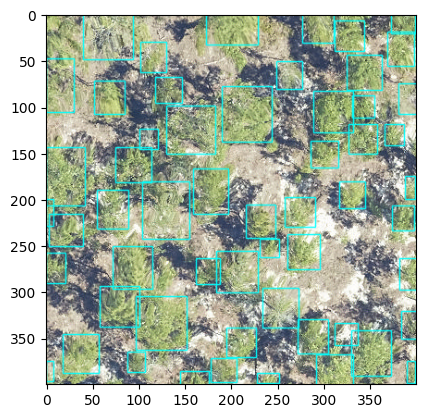

In [15]:
img = model.predict_image(path=sample_image,return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])

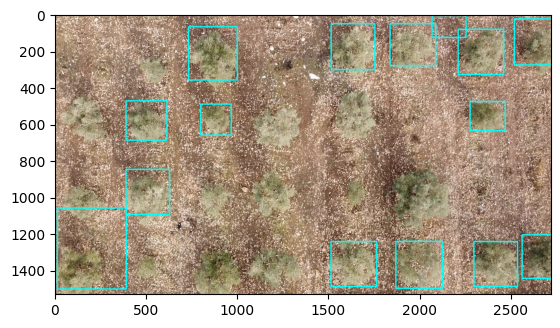

In [16]:
local_sample_path = '/Users/hakanonal/vscode/treecounter/data/geo.tiff'
img = model.predict_image(path=local_sample_path,return_plot=True,thickness=5)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])

In [17]:
boxes = model.predict_image(path=local_sample_path, return_plot = False)
boxes

,xmin,ymin,xmax,ymax,label,score,image_path
0,2206.0,78.0,2455.0,326.0,Tree,0.507177,geo.tiff
1,2271.0,474.0,2464.0,634.0,Tree,0.398602,geo.tiff
2,2292.0,1242.0,2531.0,1488.0,Tree,0.303148,geo.tiff
3,1833.0,47.0,2083.0,277.0,Tree,0.252050,geo.tiff
4,2514.0,21.0,2720.0,273.0,Tree,0.208741,geo.tiff
5,1865.0,1241.0,2121.0,1498.0,Tree,0.169035,geo.tiff
6,388.0,470.0,612.0,686.0,Tree,0.161600,geo.tiff
7,2556.0,1205.0,2720.0,1444.0,Tree,0.148690,geo.tiff
8,731.0,64.0,997.0,356.0,Tree,0.145495,geo.tiff
9,1510.0,1242.0,1760.0,1489.0,Tree,0.140999,geo.tiff


In [ ]:
raster_path = '/Users/hakanonal/vscode/deepforest/data/geo.tiff'
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=300,patch_overlap=0.25)
plt.imshow(predicted_raster[:,:,::-1])

In [26]:
import rasterio

#img = get_data("OSBS_029.tif")
#img = "/Users/hakanonal/vscode/deepforest/data/s1.tif"
#img = "/Users/hakanonal/Downloads/temp_video_for_share.mp4"
img = "/Users/hakanonal/vscode/treecounter/data/geo.tiff"
r = rasterio.open(img)
transform = r.transform 
crs = r.crs
print(crs)

EPSG:4326


In [27]:
from deepforest import utilities

m = main.deepforest()
m.use_release(check_release=False)
df = m.predict_image(path=img)
gdf = utilities.annotations_to_shapefile(df, transform=transform, crs=crs)

Reading config file: /Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/utilities.py:431: UserWarning: This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities
  warnings.warn("This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities")


In [28]:
gdf

,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,2206.0,78.0,2455.0,326.0,Tree,0.507177,geo.tiff,"POLYGON ((273.57710 30.74540, 273.57710 5.9454..."
1,2271.0,474.0,2464.0,634.0,Tree,0.398602,geo.tiff,"POLYGON ((274.47710 -8.85460, 274.47710 -24.85..."
2,2292.0,1242.0,2531.0,1488.0,Tree,0.303148,geo.tiff,"POLYGON ((281.17710 -85.65460, 281.17710 -110...."
3,1833.0,47.0,2083.0,277.0,Tree,0.252050,geo.tiff,"POLYGON ((236.37710 33.84540, 236.37710 10.845..."
4,2514.0,21.0,2720.0,273.0,Tree,0.208741,geo.tiff,"POLYGON ((300.07710 36.44540, 300.07710 11.245..."
5,1865.0,1241.0,2121.0,1498.0,Tree,0.169035,geo.tiff,"POLYGON ((240.17710 -85.55460, 240.17710 -111...."
6,388.0,470.0,612.0,686.0,Tree,0.161600,geo.tiff,"POLYGON ((89.27710 -8.45460, 89.27710 -30.0546..."
7,2556.0,1205.0,2720.0,1444.0,Tree,0.148690,geo.tiff,"POLYGON ((300.07710 -81.95460, 300.07710 -105...."
8,731.0,64.0,997.0,356.0,Tree,0.145495,geo.tiff,"POLYGON ((127.77710 32.14540, 127.77710 2.9454..."
9,1510.0,1242.0,1760.0,1489.0,Tree,0.140999,geo.tiff,"POLYGON ((204.07710 -85.65460, 204.07710 -110...."


In [ ]:
import ffmpeg
ffmpeg.probe("/Users/hakanonal/Downloads/temp_video_for_share.mp4")

In [ ]:
import subprocess

# init command
ffmpeg_command = ["ffmpeg", "-i","~/Downloads/temp_video_for_share.mp4", "-map", "0:s:0", "data/subs.srt", "pipe:1"]

# excute ffmpeg command
pipe = subprocess.run(ffmpeg_command,
                    stdout=subprocess.PIPE,
                    stderr=subprocess.PIPE,
                    bufsize=10**8)

# debug
print(pipe.stdout, pipe.stderr)



In [ ]:
import ffmpeg
ffmpeg.input("/Users/hakanonal/Downloads/temp_video_for_share.mp4").output("data/subs.srt", map = "0:s:0").run(overwrite_output=True)


I've asked to chatGPT:
can you write me a code that creates geotiff from a png file and text? Here it is...

In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS
from PIL import Image
import numpy as np

# Open the PNG file as an image
png = Image.open('data/imgsFromVid/output_00251.png')

# Extract the width and height of the image
width, height = png.size

crs = CRS.from_epsg(4326)
#left=28.0271
#top=38.5954
left, top, right, bottom = png.getbbox()
left, bottom, right, top = map(int, (left, bottom, right, top))

# Set the metadata for the GeoTIFF
meta = {
    'driver': 'GTiff',
    'dtype': 'uint8',
    'nodata': 0,
    'width': width,
    'height': height,
    'count': 3,
    'crs': CRS.from_epsg(4326),  # Set the coordinate reference system (CRS) to WGS 84 (EPSG: 4326)
    'transform': calculate_default_transform(dst_crs= CRS.from_epsg(4326), src_crs=  CRS.from_epsg(4326), width= width, height= height, left=0,right=1,top=0,bottom=1)
}

# Create a new GeoTIFF file
with rasterio.open('data/firstGeo.tiff', 'w', **meta) as dst:
    # Convert the PNG image to a NumPy array
    png_array = np.asarray(png)

    # Write the text to the GeoTIFF
    dst.write(png_array)


In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS
from PIL import Image
import numpy as np

# Open the PNG file as an image
png = Image.open('data/imgsFromVid/output_00251.png')
width, height = png.size
crs = CRS.from_epsg(4326)
left, top, right, bottom = png.getbbox()
left, bottom, right, top = map(int, (left, bottom, right, top))
print(left)
print(top)
print(right)
print(bottom)
print(width)
print(height)


In [ ]:
transform = calculate_default_transform(dst_crs= CRS.from_epsg(4326), src_crs=  CRS.from_epsg(4326), width= width, height= height, left=0,right=height,top=0,bottom=width)
transform

Finally I've asked the correct question and got the answer incouple of iterations:
```
instead of transforming can I directly write the latitude and longitude statically on a non geo coded image simple plain image?
```

In [ ]:
import rasterio
from rasterio.transform import from_origin

# Open the image
src = rasterio.open("data/imgsFromVid/output_00251.png")
# Get the width and height of the image
width, height = src.width, src.height

latidute=28.0271
longitude=38.5954


# Set the metadata for the GeoTIFF
meta = {
    'driver': 'GTiff',
    'dtype': 'uint8',
    'nodata': 0,
    'width': width,
    'height': height,
    'count': 3,
    'crs': rasterio.crs.CRS.from_epsg(4326),  # Set the CRS to EPSG: 4326 (WGS 84)
    'transform': from_origin(latidute, longitude, 0.1, 0.1)  # Set the latitude and longitude coordinates as the origin
}

# Create the GeoTIFF file
with rasterio.open("data/geo.tiff", 'w', **meta) as dst:
    # Copy the data from the source image to the GeoTIFF
    dst.write(src.read())

src.close()